In [1]:
!pip install minisom

In [2]:
!pip install sklearn-som

# imports

In [3]:
## for scraping

import requests
import numpy as np
import pandas as pd
import re
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier 
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
##skill learn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn_som.som import SOM



# functions

In [4]:
# use this function to make feature selection 
def select_feature(X_TR, y_TR, X_TS, y_TS, FSM, MODEL):
 #define the feature selection method 
  fs = FSM
  # make fit to model to apply to train data 
  fs.fit(X_TR, y_TR)
  X_TR_new = fs.transform(X_TR)
  # transform to test data 
  X_TS_new = fs.transform(X_TS) 
  # apply model on the new data after make feature selection 
  MODEL.fit(X_TR_new, y_TR)
  yPred = model.predict(X_TS_new)
  # get accuracy 
  acc = accuracy_score(y_TS, yPred)
  return acc

In [5]:
def getAccuracy(model, x, y):
  y_pred=model.predict(x)

  return accuracy_score(y, y_pred)*100

In [6]:
def get_predect(pip,Xtrain, ytrain,Xtest,y):
  pip.fit(Xtrain, ytrain)

# Predicting the Test set results
  y_pred = pip.predict(Xtest)
  acc=accuracy_score(y, y_pred)*100
  print( acc)
  return y_pred,acc

In [7]:
def tnesplot(pip,X,y,lable):
  tsne = TSNE(n_components=2, verbose=1, random_state=123)
  z = tsne.fit_transform(X)
  df = pd.DataFrame()
  df["y"] = y
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]
  Title=" T-SNE projection "+lable

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                  palette=sns.color_palette("hls", 2),
                  data=df).set(title=Title)

In [8]:
def supervsplting(df):
  X=df.iloc[:,:-1]
  y=df.iloc[:,-1]
  Xtrain , ytrain,Xtest,ytest= X[:576],y[:576],X[576:],y[576:]
  return Xtrain , ytrain,Xtest,ytest

In [9]:
def unsupervsplting(df):
  X=df.iloc[:,:-1]
  y=df.iloc[:,-1]
  return X,y

In [10]:
def filter(pip,Xtrain, ytrain,Xtest,ytest):
  acclis=[]
  pred=[]
  Xtrains=[]
  from sklearn.feature_selection import chi2

  for i in range(2,8):
    sel_five_cols = SelectKBest(chi2, k=i)
    sel_five_cols.fit(Xtrain, ytrain)
    newXtrain=Xtrain[Xtrain.columns[sel_five_cols.get_support()]]
    newXtest=Xtest[Xtrain.columns[sel_five_cols.get_support()]]
    ypred,acc=get_predect(pip,newXtrain, ytrain,newXtest,ytest)
    acclis.append(acc)
    pred.append(ypred)
    Xtrains.append((newXtrain,newXtest))
  return pred,acclis,Xtrains



In [11]:
def warber(pip,Xtrain, ytrain,Xtest,ytest):  #importing the necessary libraries
  # Sequential Forward Selection(sfs)
  acclis=[]
  pred=[]

  for i in range(2,8):

    sfs = SequentialFeatureSelector(pip, n_features_to_select=i)
    sfs.fit(Xtrain, ytrain)
    newii=sfs.transform(Xtrain)
    newii2=sfs.transform(Xtest)


    ypred,acc=get_predect(pip,newii, ytrain,newii2,ytest)
    acclis.append(acc)
    pred.append(ypred)
  return pred,acclis


In [12]:
df = pd.read_csv("Assignment3_dataset.csv")


In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0


In [14]:
Xtrain , ytrain,Xtest,ytest=supervsplting(df)

In [15]:
X,y=unsupervsplting(df)

# problem 2.1 

KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
Knn = Pipeline(
   [
       (
           "KNN",
           KNeighborsClassifier(
           ),
       ),
   ]
)
knn_yhat,Knn_acc=get_predect(Knn,Xtrain, ytrain,Xtest,ytest)


75.0


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.140740


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.457039
[t-SNE] KL divergence after 1000 iterations: 0.950104


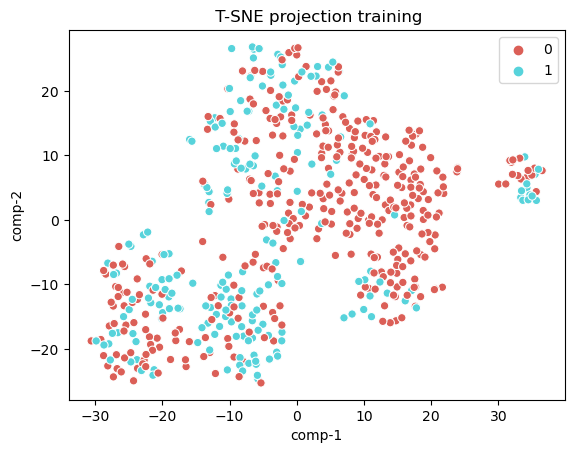

In [17]:
tnesplot(Knn,Xtrain, ytrain,'training')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.179733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.544556
[t-SNE] KL divergence after 800 iterations: 0.548004


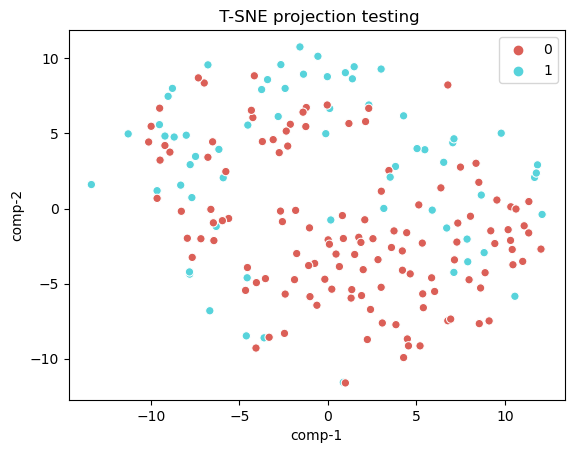

In [18]:
tnesplot(Knn,Xtest,ytest,'testing')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.179733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.544556
[t-SNE] KL divergence after 800 iterations: 0.548004


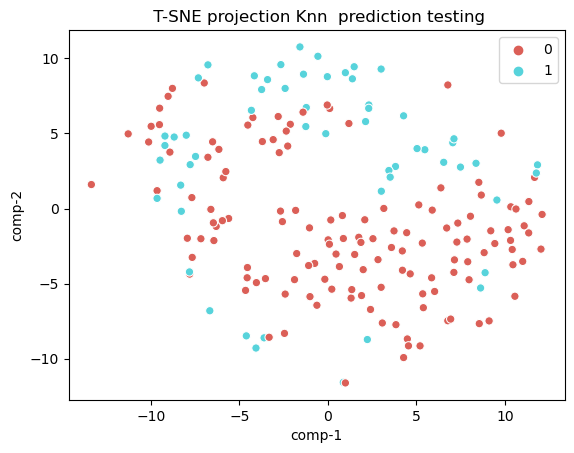

In [19]:
tnesplot(Knn,Xtest,knn_yhat,'Knn  prediction testing')

LR

In [20]:
from sklearn.linear_model import LogisticRegression
LR = Pipeline(
   [
       (
           "LR",
           LogisticRegression(
           ),
       ),
   ]
)
LR_yhat,LR_acc=get_predect(LR,Xtrain, ytrain,Xtest,ytest)


77.08333333333334


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.179733


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.544556
[t-SNE] KL divergence after 800 iterations: 0.548004


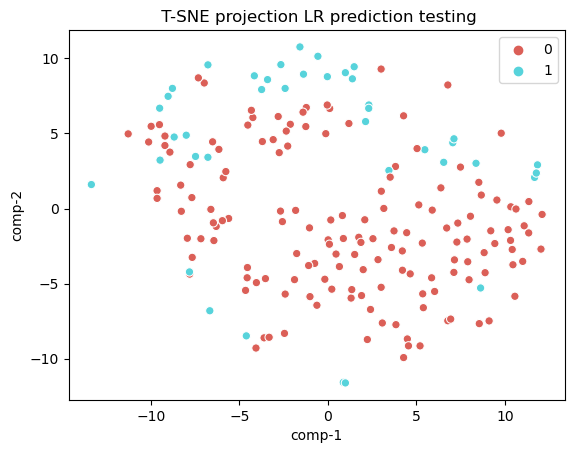

In [21]:
tnesplot(Knn,Xtest,LR_yhat,'LR prediction testing')

#problem 2.3

In [22]:
from sklearn.decomposition import PCA
Pca=Pipeline([ ("pca", PCA())])


70.83333333333334
76.04166666666666
76.04166666666666
76.04166666666666
75.52083333333334
78.64583333333334
77.08333333333334


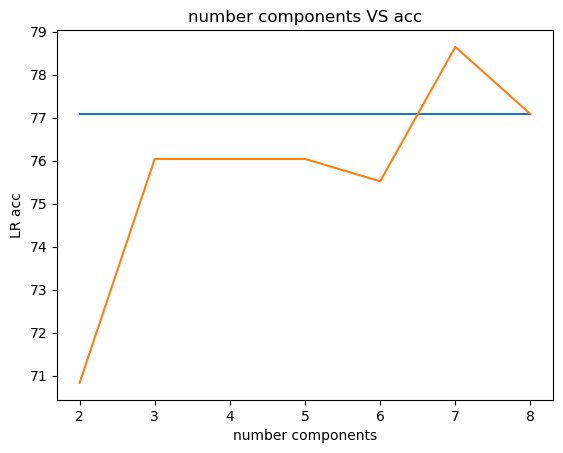

In [23]:
Lraccs = []
for i in range(2, 9):
    Pca["pca"].n_components= i
    
    newXtr=Pca.fit_transform(Xtrain)
    newXte=Pca.transform(Xtest)
    ypred,acc=get_predect(LR,newXtr, ytrain,newXte,ytest)
    Lraccs.append(acc)
plt.plot(range(2, 9), [LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc])

plt.plot(range(2, 9), Lraccs)
plt.title('number components VS acc')
plt.xlabel('number components')
plt.ylabel('LR acc')
plt.show()

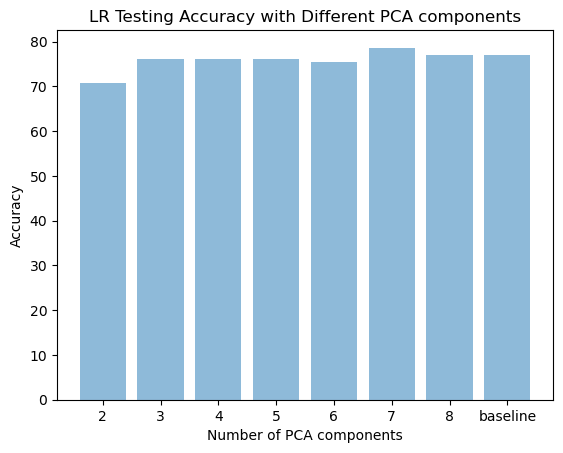

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('2','3','4','5','6','7','8','baseline' )
y_pos = np.arange(len(objects))
performance=Lraccs
performance.append(LR_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title('LR Testing Accuracy with Different PCA components')

plt.show()

65.10416666666666
72.91666666666666
76.04166666666666
70.83333333333334
70.83333333333334
76.04166666666666
75.0


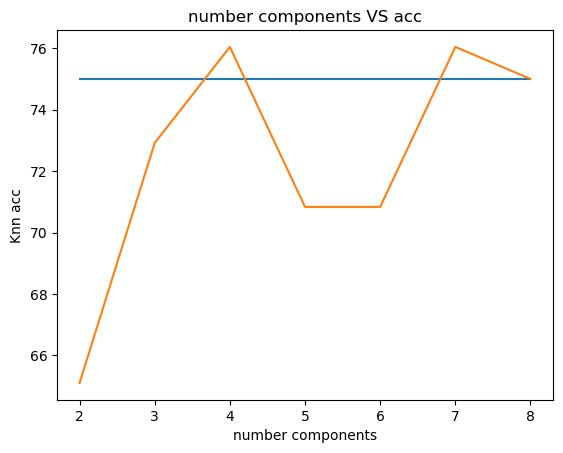

In [25]:
Knnaccs = []
for i in range(2, 9):
    Pca["pca"].n_components= i
    
    newXtr=Pca.fit_transform(Xtrain)
    newXte=Pca.transform(Xtest)
    ypred,acc=get_predect(Knn,newXtr, ytrain,newXte,ytest)
    Knnaccs.append(acc)

plt.plot(range(2, 9), [Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc])
plt.plot(range(2, 9), Knnaccs)

plt.title('number components VS acc')
plt.xlabel('number components')
plt.ylabel('Knn acc')
plt.show()

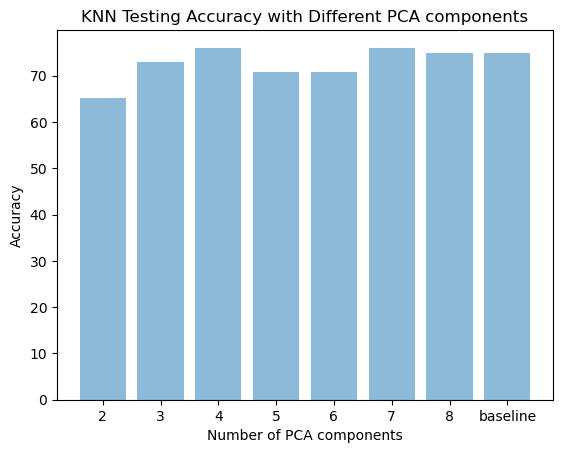

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('2','3','4','5','6','7','8','baseline' )
y_pos = np.arange(len(objects))
performance=Knnaccs
performance.append(Knn_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title('KNN Testing Accuracy with Different PCA components')

plt.show()

In [27]:
Pca["pca"].n_components= 7
newXtr=Pca.fit_transform(Xtrain)
newXte=Pca.transform(Xtest)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.135351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.458214
[t-SNE] KL divergence after 1000 iterations: 0.913300


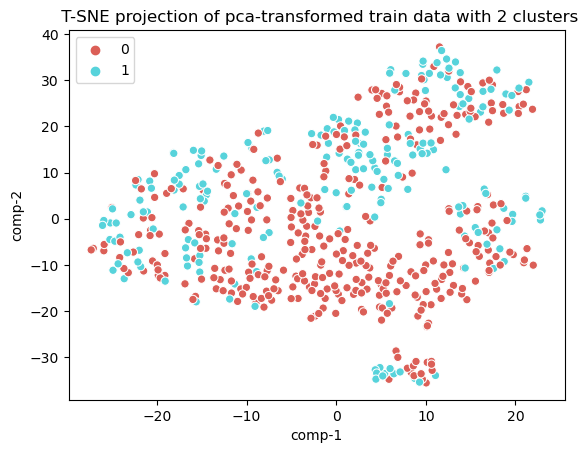

In [28]:
tnesplot(Knn,newXtr,ytrain,'of pca-transformed train data with 2 clusters')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.176144
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.783722
[t-SNE] KL divergence after 1000 iterations: 0.536057


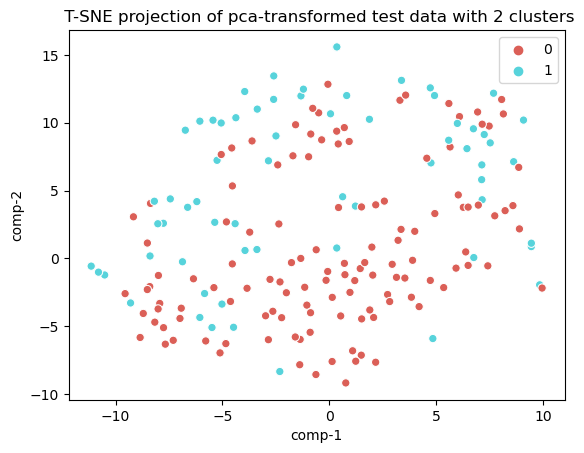

In [29]:
tnesplot(Knn,newXte,ytest,'of pca-transformed test data with 2 clusters')

# Problem 2.4

filter


75.0
76.5625
77.08333333333334
78.125
74.47916666666666
73.4375


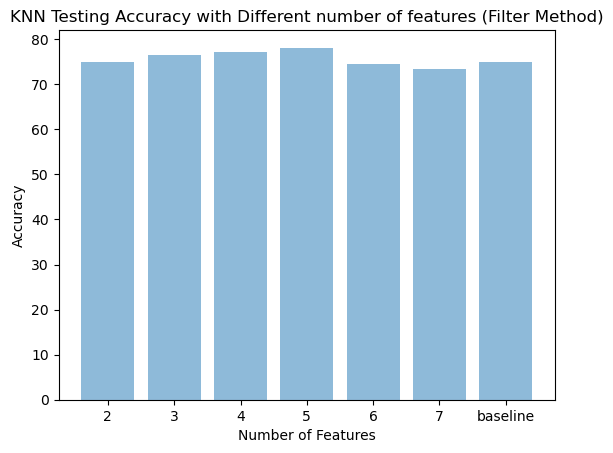

In [30]:
performance=[]
knnfpred,knnfacc,knnXtrains=filter(Knn,Xtrain, ytrain,Xtest,ytest)
objects = ('2','3','4','5','6','7','baseline' )
y_pos = np.arange(len(objects))
performance=knnfacc
performance.append(Knn_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('KNN Testing Accuracy with Different number of features (Filter Method)')

plt.show()

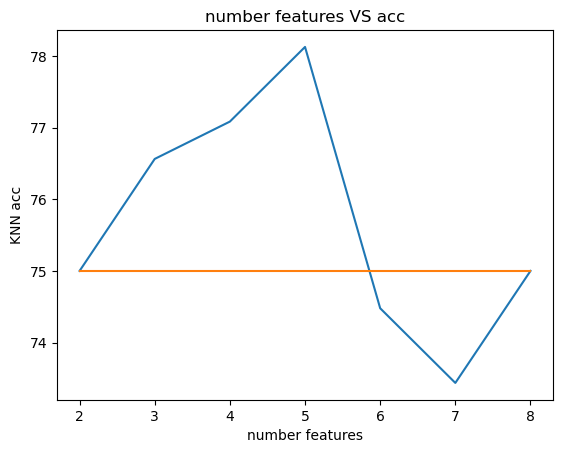

In [31]:
plt.plot(range(2, 9),knnfacc)

plt.plot(range(2,9), [Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc])
plt.title('number features VS acc')
plt.xlabel('number features')
plt.ylabel('KNN acc')
plt.show()

LR

77.60416666666666
78.125
77.60416666666666
78.125
77.60416666666666
78.125


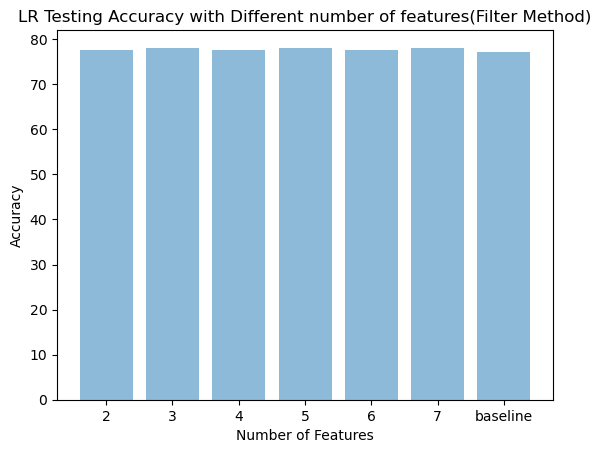

In [33]:
performance=[]
LRfpred,LRfacc,LRX=filter(LR,Xtrain, ytrain,Xtest,ytest)
objects = ('2','3','4','5','6','7','baseline' )
y_pos = np.arange(len(objects))
performance=LRfacc
performance.append(LR_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('LR Testing Accuracy with Different number of features(Filter Method)')

plt.show()

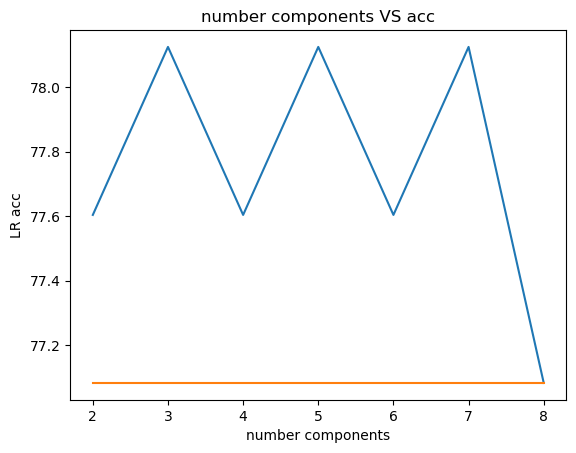

In [34]:
plt.plot(range(2, 9),LRfacc)

plt.plot(range(2,9),[LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc])
plt.title('number components VS acc')
plt.xlabel('number components')
plt.ylabel('LR acc')
plt.show()

chi2

71.35416666666666
72.39583333333334
72.91666666666666
76.5625
76.04166666666666
76.04166666666666


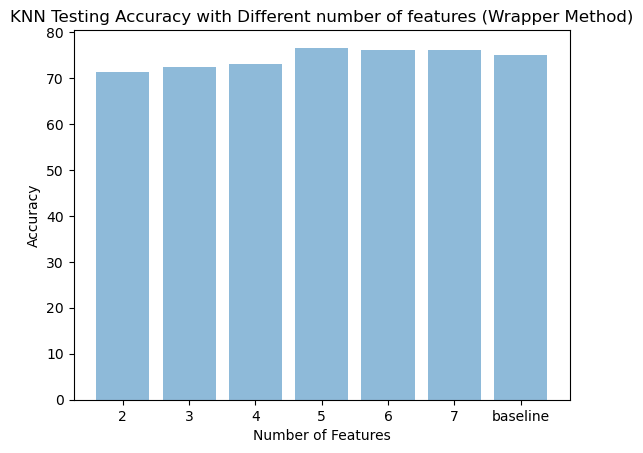

In [35]:
performance=[]
Knnwpred,Knnwacc=warber(Knn,Xtrain, ytrain,Xtest,ytest)
objects = ('2','3','4','5','6','7','baseline' )
y_pos = np.arange(len(objects))
performance=Knnwacc
performance.append(Knn_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('KNN Testing Accuracy with Different number of features (Wrapper Method)')

plt.show()

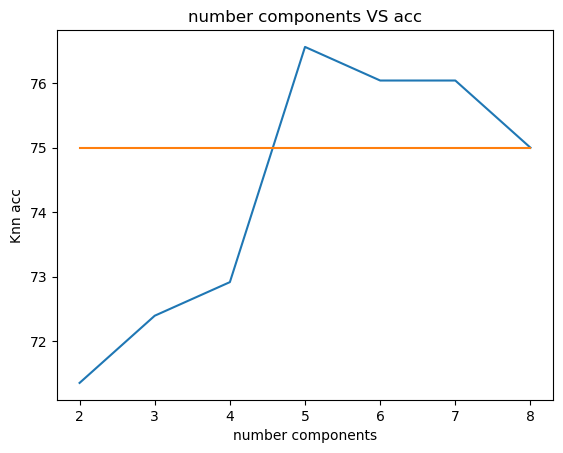

In [36]:
plt.plot(range(2, 9),Knnwacc)

plt.plot(range(2,9),[Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc,Knn_acc])
plt.title('number components VS acc')
plt.xlabel('number components')
plt.ylabel('Knn acc')
plt.show()

77.08333333333334
78.125
76.5625
77.60416666666666
78.125
78.125


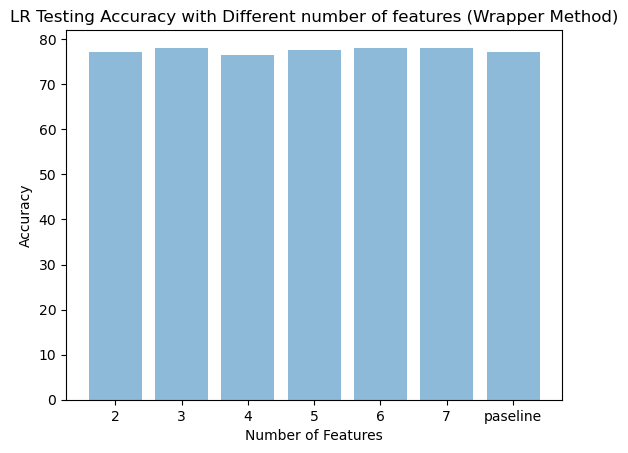

In [37]:
performance=[]
LRwpred,LRwacc=warber(LR,Xtrain, ytrain,Xtest,ytest)
objects = ('2','3','4','5','6','7','paseline' )
y_pos = np.arange(len(objects))
performance=LRwacc
performance.append(LR_acc)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('LR Testing Accuracy with Different number of features (Wrapper Method)')

plt.show()

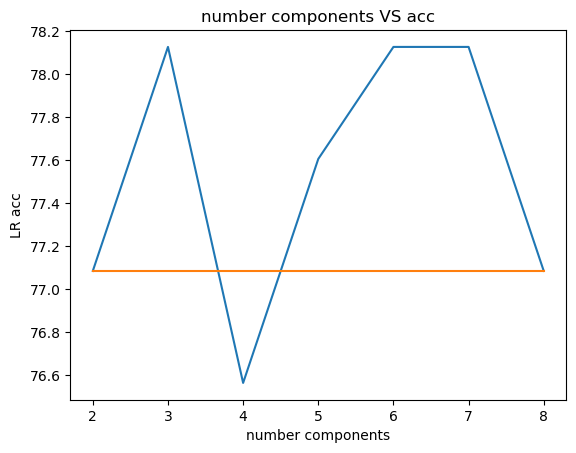

In [38]:
plt.plot(range(2, 9),LRwacc)

plt.plot(range(2,9),[LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc,LR_acc])
plt.title('number components VS acc')
plt.xlabel('number components')
plt.ylabel('LR acc')
plt.show()

In [39]:
knn_btrain,knn_btest=knnXtrains[3]

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 576 samples in 0.001s...
[t-SNE] Computed neighbors for 576 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 576 / 576
[t-SNE] Mean sigma: 0.097566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.253563
[t-SNE] KL divergence after 1000 iterations: 0.850390


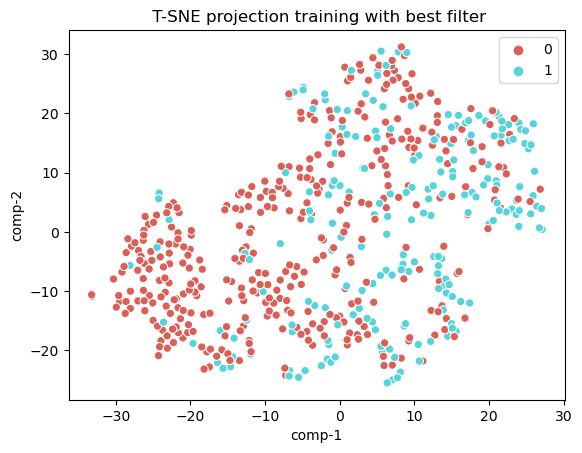

In [40]:
tnesplot(Knn,knn_btrain, ytrain,'training with best filter')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.132995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.268208
[t-SNE] KL divergence after 1000 iterations: 0.535372


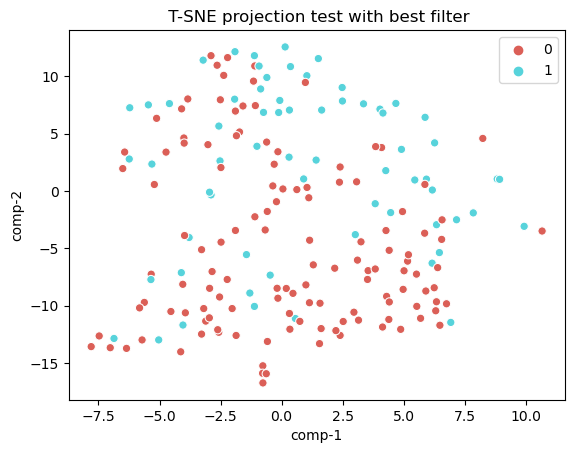

In [41]:
tnesplot(Knn,knn_btest, ytest,'test with best filter')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.001s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 0.132995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.268208
[t-SNE] KL divergence after 1000 iterations: 0.535372


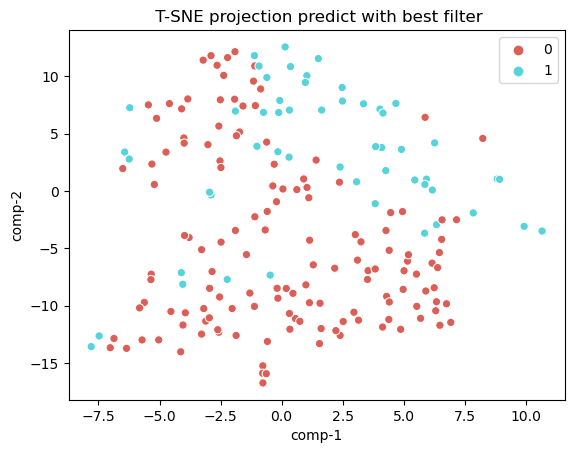

In [42]:
tnesplot(Knn,knn_btest, knnfpred[3],'predict with best filter')

# problem 2.2

In [43]:
from sklearn.cluster import KMeans,DBSCAN

Kmeanclusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=2,
               init="k-means++",
               random_state=42,
           ),
       ),
   ]
)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


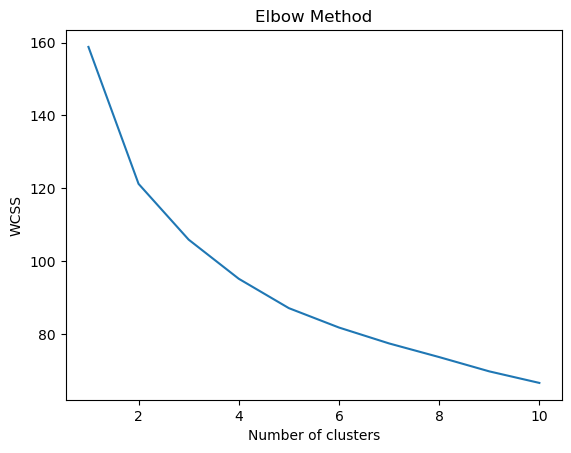

In [44]:
wcss = []
for i in range(1, 11):
    Kmeanclusterer["kmeans"].n_clusters= i
    Kmeanclusterer.fit(X)

    wcss.append(Kmeanclusterer["kmeans"].inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
Kmeanclusterer["kmeans"].n_clusters= 2


In [45]:
silhouette_scores = []
ari_scores = []
for n in range(2, 11):

    Kmeanclusterer["kmeans"].n_clusters= n
    Kmeanclusterer.fit(X)
    silhouette_coef = silhouette_score(X,
        Kmeanclusterer["kmeans"].labels_)
   
    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)

In [46]:
silhouette_scores

[0.26114611150604655,
 0.18151103414798975,
 0.20808119301398578,
 0.20075741354829582,
 0.16846681409923434,
 0.15016758314290643,
 0.15933898693417617,
 0.15170390726483457,
 0.16122597530553154]

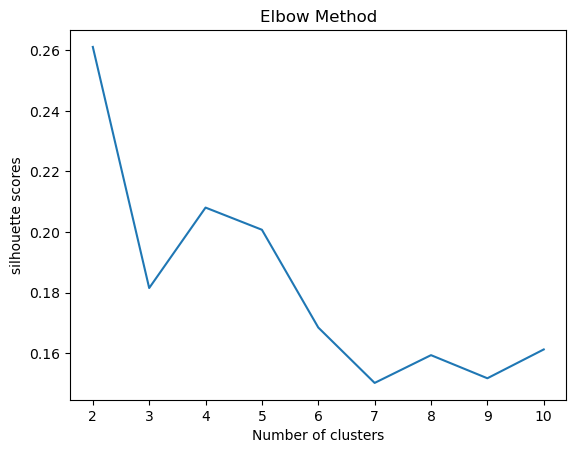

In [47]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette scores')
plt.show()


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.002s...
[t-SNE] Computed neighbors for 768 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.130038
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.617271
[t-SNE] KL divergence after 1000 iterations: 0.985816


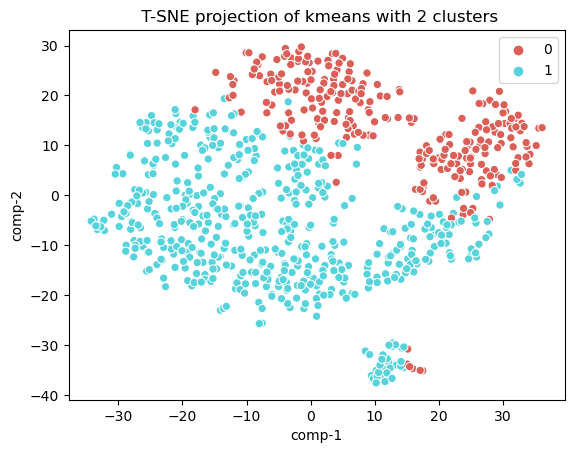

In [48]:
Kmeanclusterer["kmeans"].n_clusters= 2
Kmeanclusterer.fit(X)
new_y=Kmeanclusterer["kmeans"].labels_
tnesplot(Kmeanclusterer,X,new_y,'of kmeans with 2 clusters')

# problem 2.5

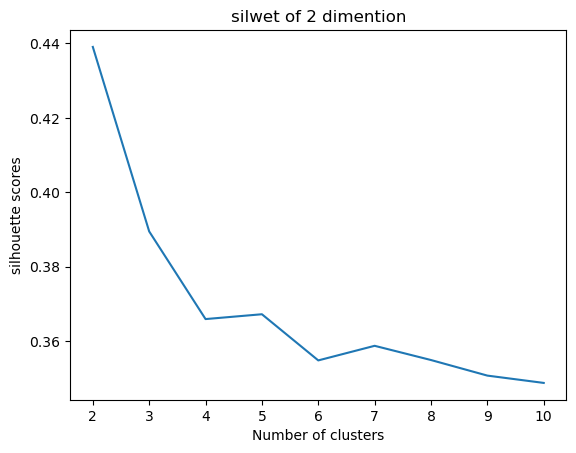

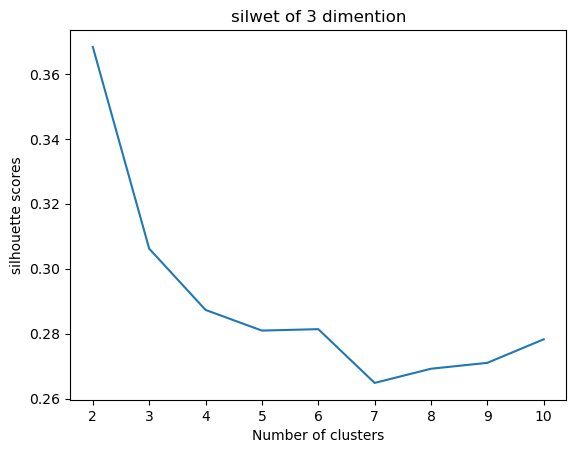

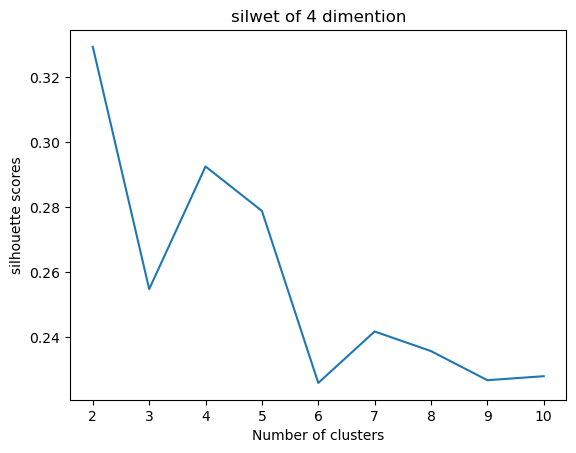

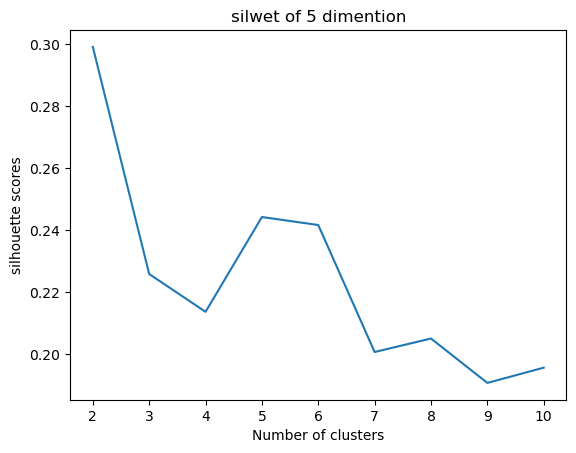

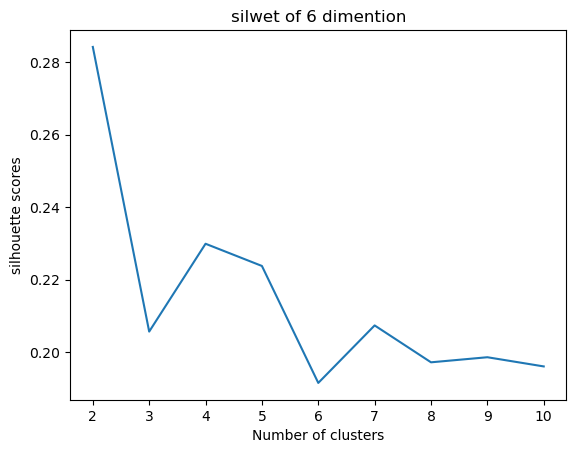

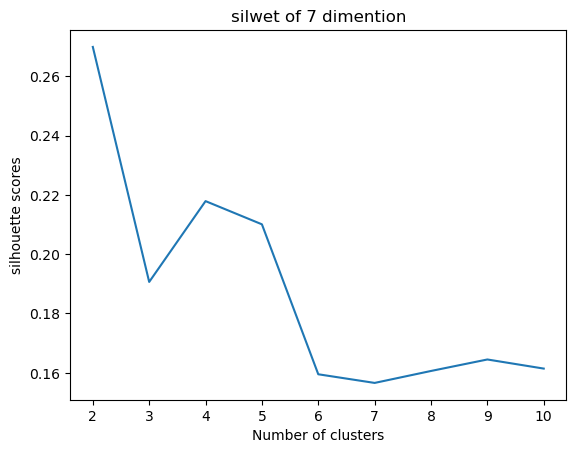

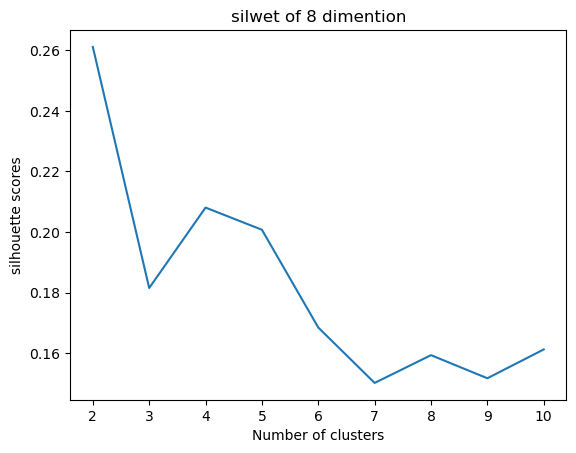

In [49]:
Lraccs = []
for i in range(2, 9):
    Pca["pca"].n_components= i
    
    newX=Pca.fit_transform(X)
    silhouette_scores = []
    arcores = []
    for n in range(2, 11):

        Kmeanclusterer["kmeans"].n_clusters= n
        Kmeanclusterer.fit(newX)
        silhouette_coef = silhouette_score(newX,
            Kmeanclusterer["kmeans"].labels_)
      
        # Add metrics to their lists
        silhouette_scores.append(silhouette_coef)
    plt.plot(range(2, 11), silhouette_scores)
    plt.title('silwet of {:} dimention'.format(i))
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette scores')
    plt.show()
   


# problem 2.6

In [50]:
from minisom import MiniSom
import numpy as np
import pandas as pd
Pca["pca"].n_components= 7

newX=Pca.fit_transform(X)

data = newX
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)


# Initialization and training
som_shape = (1, 2)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)
k = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)
k.train_batch(data, 1, verbose=True)
som.train_batch(data, 500, verbose=True)

 [ 1 / 1 ] 100% - 0:00:00 left 
 quantization error: 2.571230484313396
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 2.530295116782963


In [51]:
# each neuron represents a cluster
winner_coordinates = np.array([k.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

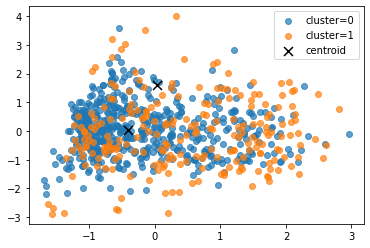

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

In [53]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

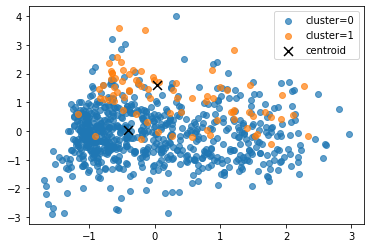

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

In [55]:
_, dim=newX.shape
somsh=[]
for i in range(2,31) :
        model=SOM(i, n=1, dim=dim)
    
        predLabels = model.fit_predict(newX)
        score = silhouette_score(newX, predLabels, random_state=0)
        somsh.append(score)
        print(f'{model.__class__.__name__}: '
              f'Silhouette Score = {score}; ')

SOM: Silhouette Score = 0.22854753017006604; 
SOM: Silhouette Score = 0.13643865629222035; 
SOM: Silhouette Score = 0.13734842342893352; 
SOM: Silhouette Score = 0.0940482881531181; 
SOM: Silhouette Score = 0.11571915325155845; 
SOM: Silhouette Score = 0.1019341972495645; 
SOM: Silhouette Score = 0.08127810741744425; 
SOM: Silhouette Score = 0.10359653120737812; 
SOM: Silhouette Score = 0.0874119374506263; 
SOM: Silhouette Score = 0.0659129513805817; 
SOM: Silhouette Score = 0.09362519130202285; 
SOM: Silhouette Score = 0.0941787028563675; 
SOM: Silhouette Score = 0.10027161983783783; 
SOM: Silhouette Score = 0.09345734614360733; 
SOM: Silhouette Score = 0.09940942791725448; 
SOM: Silhouette Score = 0.07737123155661925; 
SOM: Silhouette Score = 0.08929344459256151; 
SOM: Silhouette Score = 0.07494813306399443; 
SOM: Silhouette Score = 0.08546988779137725; 
SOM: Silhouette Score = 0.08914087453448498; 
SOM: Silhouette Score = 0.08610826574273034; 
SOM: Silhouette Score = 0.0674253572386

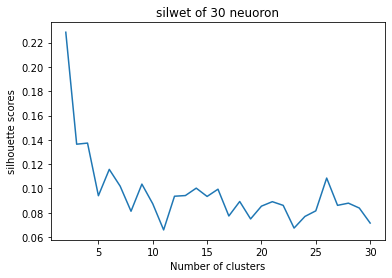

In [56]:
  plt.plot(range(2, 31), somsh)
  plt.title('silwet of {:} neuoron'.format(i))
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette scores')
  plt.show()

# problem 2.7

In [57]:
epsilon=[0.3,.4,.5,.6,0.7]
minpoints=range(2,16)
mo = pd.DataFrame()
#find DBSCAN optimal eps and min-samples 
epsList, msList, ncluster,labels = list(), list(), list(),list()
for eps in epsilon:
  for ms in minpoints:
    model = DBSCAN(eps=eps, min_samples=ms).fit(X)
    label =model.labels_
#3shan anomoly ems7  - (1 if -1 in label else 0)
    numc=(len(set(label)) - (1 if -1 in label else 0))
    
    epsList.append(eps)
    msList.append(ms)
    ncluster.append(numc)
    labels.append(label)
mo['epsList'],mo['msList'],mo['ncluster'],mo['labels']=epsList, msList, ncluster,labels



In [58]:
z=mo[mo['ncluster']>=2]

In [59]:
scores=[]
for i in  z['labels'] : 
    score = silhouette_score(X, i, random_state=0)
    scores.append(score )

In [60]:
z['scores']=scores


<ipython-input-60-db8b74be2340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['scores']=scores


In [61]:
z=z.sort_values(by="scores",ascending=False)

In [62]:
newz=z[0:10]
newz

,epsList,msList,ncluster,labels,scores
14,0.4,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.286938
2,0.3,4,3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.255704
5,0.3,7,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.255690
3,0.3,5,3,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ...",0.255503
6,0.3,8,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.255465
4,0.3,6,3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.250714
7,0.3,9,2,"[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,...",0.241373
8,0.3,10,2,"[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,...",0.234830
9,0.3,11,2,"[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,...",0.231672
10,0.3,12,2,"[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,...",0.223967


<ipython-input-63-9bc9e644c8bf>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(newz['epsList'],newz['ncluster'] )


<function matplotlib.pyplot.show(*args, **kw)>

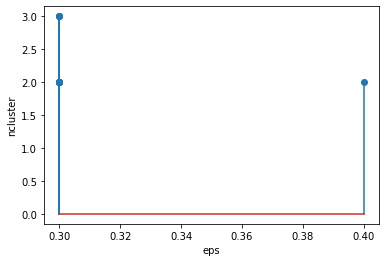

In [63]:

plt.stem(newz['epsList'],newz['ncluster'] )
plt.ylabel("ncluster")
plt.xlabel("eps")
plt.show

<ipython-input-64-4093fa1d23b6>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(newz['msList'],newz['ncluster'] )


<function matplotlib.pyplot.show(*args, **kw)>

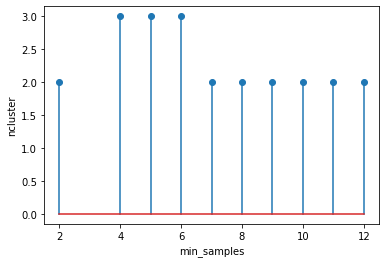

In [64]:
plt.stem(newz['msList'],newz['ncluster'] )
plt.xlabel("min_samples")
plt.ylabel("ncluster")
plt.show